In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [68]:
from google.colab import files
uploaded = files.upload()

Saving Admission prediction.csv to Admission prediction (2).csv


In [69]:

admission = pd.read_csv("/content/Admission prediction.csv")


In [70]:
admission.head() # to see the top five records of the data sets

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
admission.shape # to  see what is the shape of data_set our data set has 400 records and 9 fields

(500, 9)

In [72]:
admission.columns #to see the name of the fields 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [73]:
admission.describe() # to see the mathematical values of the data sets i.e mean,standar_deviation ,minimum_value,maximum_value,counts etc.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [74]:
admission.info() #to see the type of values in every fields i.e int ,float etc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [75]:
admission.isnull().sum() # to see that if dataset has any null_values or not

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [76]:
# the dataset has no null_values so there is no need to fill null_values

In [77]:
# now preparing the input data_set and out_labels

In [78]:
X=admission.drop(['Serial No.','Chance of Admit '],axis=1) #input data_set
X.shape

(500, 7)

In [79]:
y=admission['Chance of Admit '] #output labels
y.shape

(500,)

In [80]:
admission.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
89,90,316,109,4,4.5,3.5,8.76,1,0.74
112,113,301,107,3,3.5,3.5,8.34,1,0.62
477,478,309,105,4,3.5,2.0,8.18,0,0.65
351,352,325,110,4,3.5,4.0,8.67,1,0.73
130,131,339,114,5,4.0,4.5,9.76,1,0.96


<ipython-input-81-b8e053f5381f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(admission['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

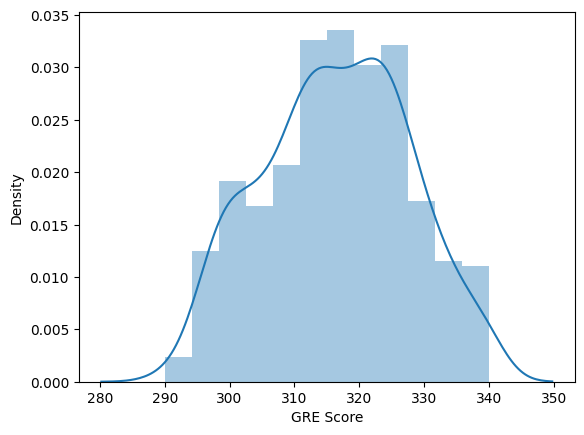

In [81]:
sns.distplot(admission['GRE Score'])

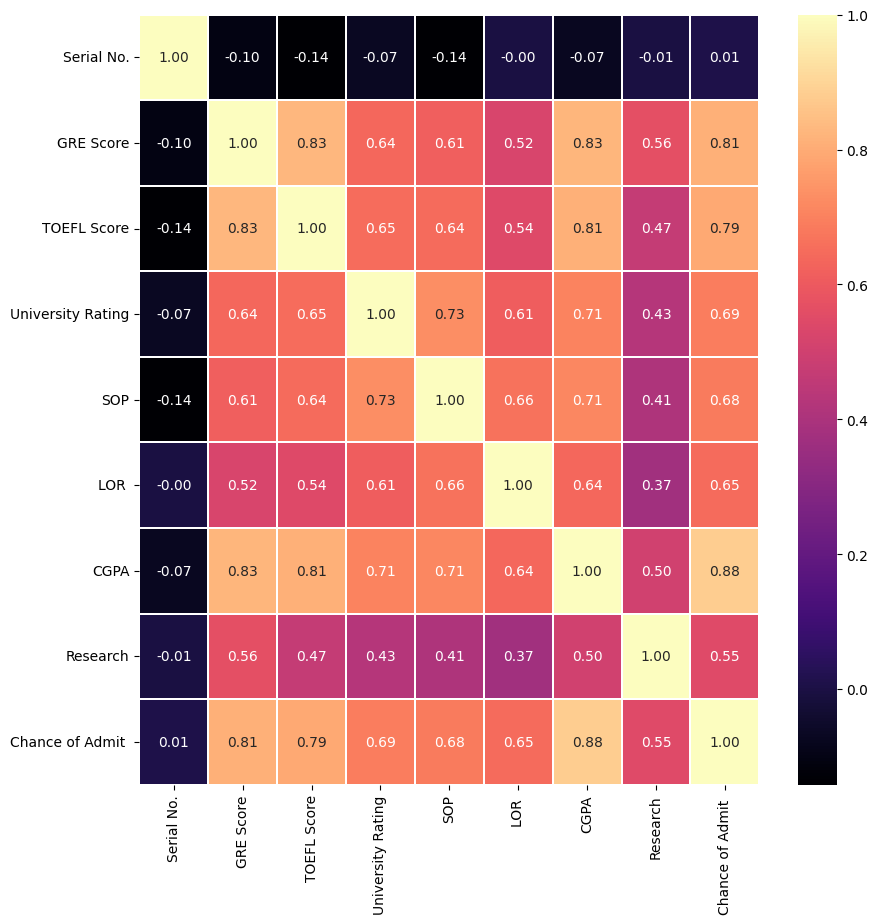

In [82]:
plt.figure(figsize=(10, 10))

sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

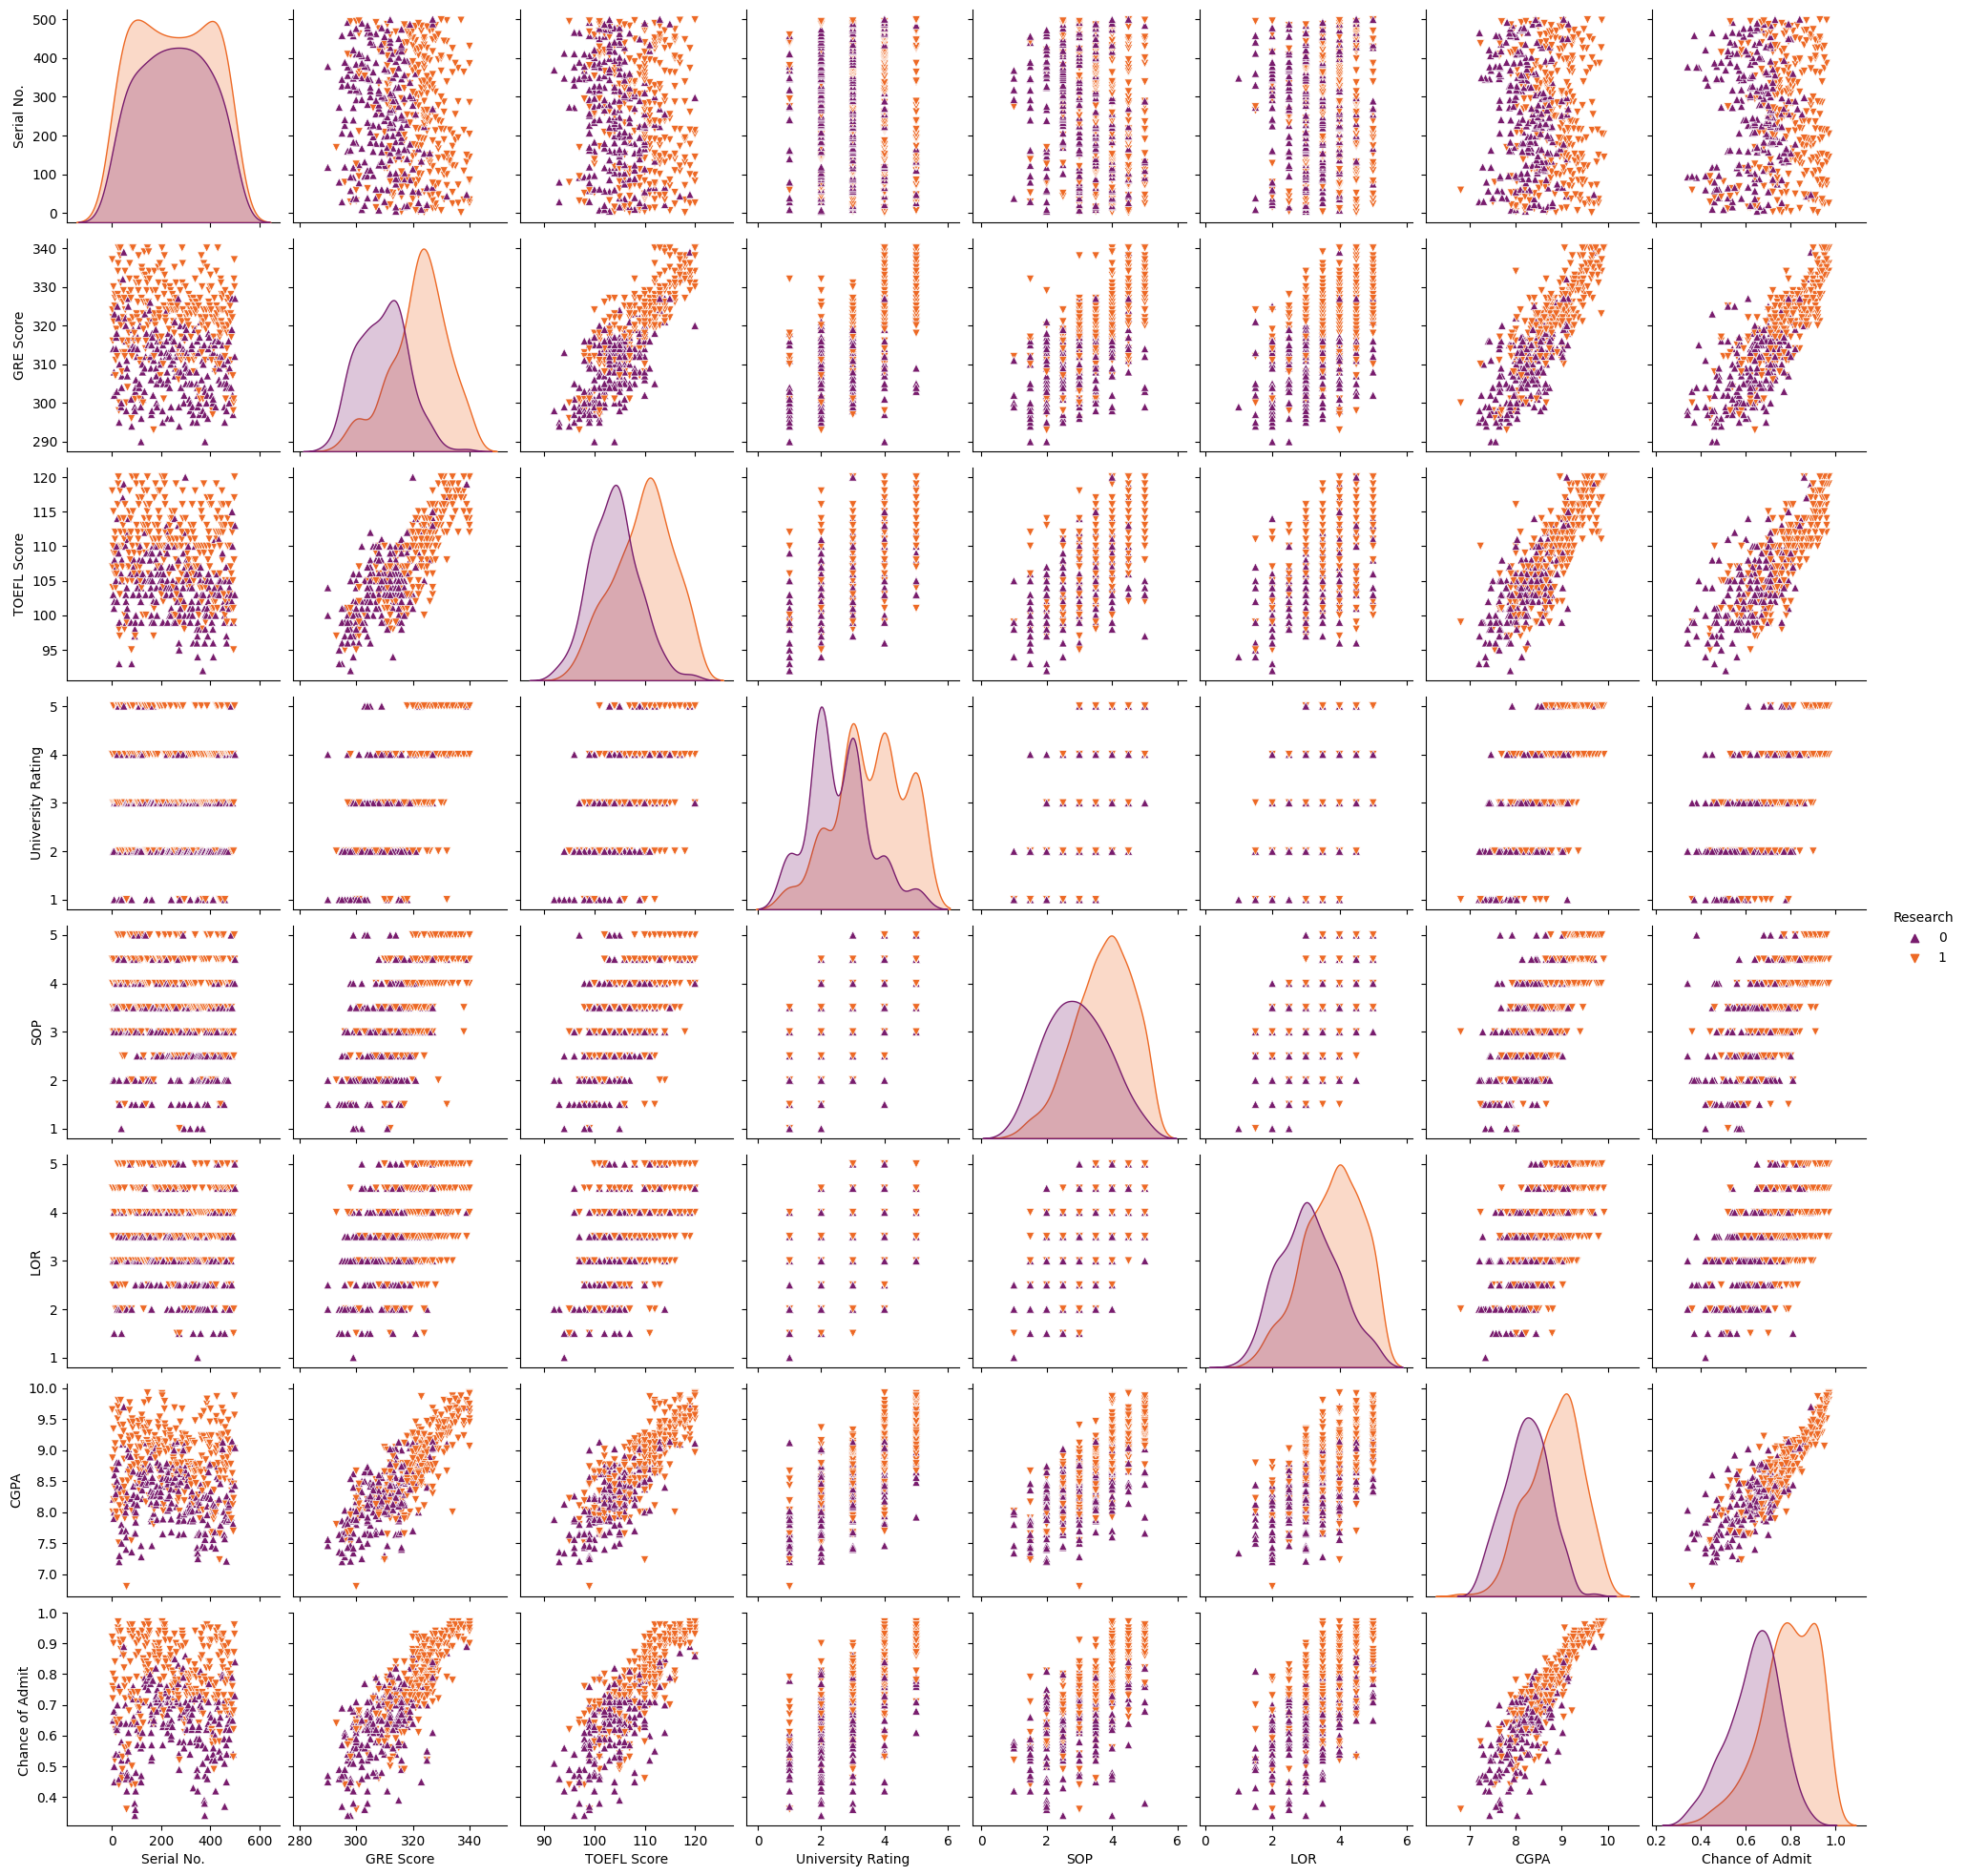

In [83]:
sns.pairplot(data=admission,hue='Research',markers=['^','v'],palette='inferno')

***#now observing the inter_relation between various fiels in dataset using graps***

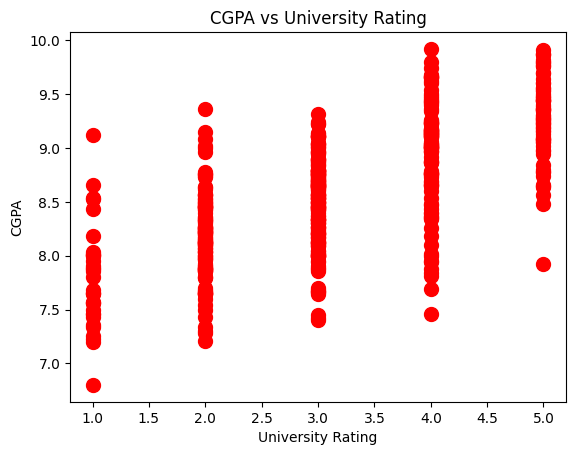

In [84]:
plt.scatter(admission['University Rating'],admission['CGPA'],color='Red',s=100)
plt.title('CGPA vs University Rating')
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()

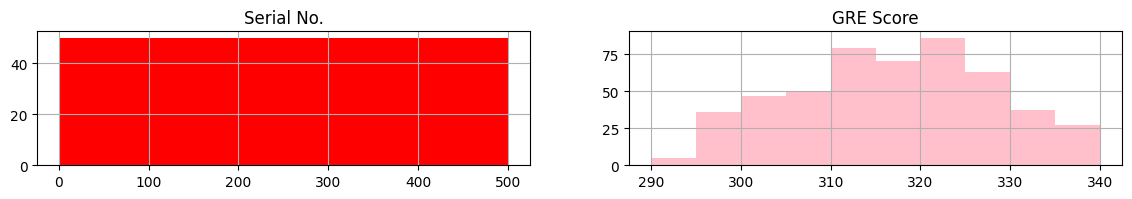

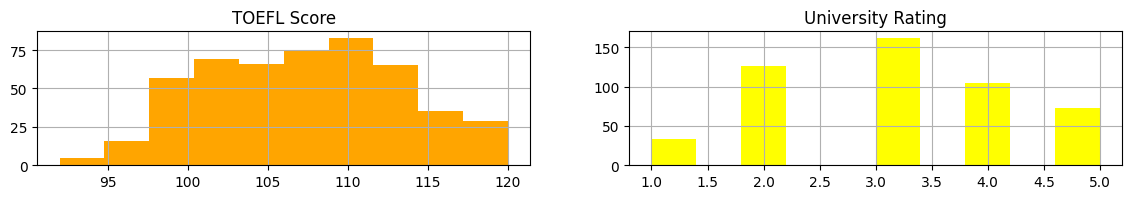

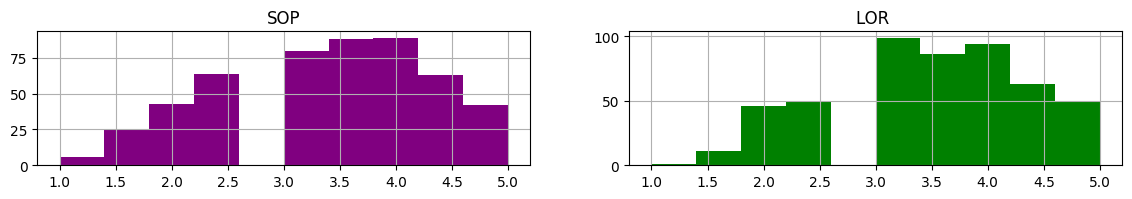

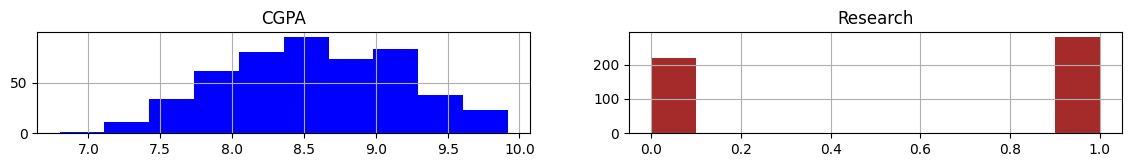

In [85]:
category=admission.columns
color=['Red','Pink','Orange','Yellow','Purple','Green','Blue','Brown']
start=True
for i in np.arange(4):
  fig=plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  admission[category[2*i]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  admission[category[2*i+1]].hist(color=color[2*i+1],bins=10)
  plt.title(category[2*i+1])
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [86]:
x= admission.drop(['Serial No.','Chance of Admit '],axis=1)

x
  

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [87]:
y= admission['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [88]:

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)


In [89]:
#splittin the input data(x) and output labels(y) into train data and test data 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) # test_size defins the volume of train data and test data here 0.2 means 20% of the data belongs to the test data

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
285,0.808511,0.857143,1.00,0.750,0.750,0.788462,1.0
402,0.659574,0.607143,0.50,0.625,0.500,0.685897,1.0
149,0.382979,0.500000,0.25,0.625,0.500,0.467949,1.0
24,0.914894,0.964286,1.00,0.750,0.625,0.961538,1.0
85,0.553191,0.392857,0.75,0.875,0.625,0.596154,0.0


In [92]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [93]:
rgr.score(X_test,y_test)

0.7604181213859674

In [94]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xg.score(X_test,y_test)

In [ ]:
y_predict=rgr.predict(X_test)
y_predict


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

In [ ]:
import tensorflow as tf
from tensorflow.python import keras
from keras import layers
from keras.layers import Activation,Dense,Dropout


In [97]:
classifier=keras.Sequential()
classifier.add(Dense(7, activation='relu', input_dim=7))
classifier.add(Dense (7, activation='relu'))
classifier.add(Dense(1, activation='linear'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])



In [98]:
model_history = classifier.fit(X_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 104ms/step - loss: 10.2924 - accuracy: 0.0000e+00 - val_loss: 9.6205 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 9.0898 - accuracy: 0.0000e+00 - val_loss: 8.8408 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 7.9413 - accuracy: 0.0000e+00 - val_loss: 7.9350 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 7.0800 - accuracy: 0.0000e+00 - val_loss: 6.6474 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 6.4814 - accuracy: 0.0000e+00 - val_loss: 5.9096 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 5.7264 - accuracy: 0.0000e+00 - val_loss: 5.1689 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 5.1468 - accuracy: 0.0000e+00 - val_lo

In [99]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_3 (ModuleWrap (None, 7)                 56        
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 7)                 56        
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [100]:
from sklearn.metrics import accuracy_score,classification_report
train_predictions=classifier.predict(X_test)
print(train_predictions)

[[0.5842413 ]
 [0.35650513]
 [0.40351743]
 [0.6039799 ]
 [0.5125361 ]
 [0.38297063]
 [0.6240261 ]
 [0.685414  ]
 [0.9152668 ]
 [0.7752528 ]
 [0.56051713]
 [1.0050372 ]
 [0.48317465]
 [0.39217886]
 [0.76041824]
 [0.3941892 ]
 [0.4641843 ]
 [0.74595636]
 [0.97679484]
 [0.31542775]
 [0.61645985]
 [0.69922614]
 [0.39757535]
 [0.9328147 ]
 [0.9146868 ]
 [0.5270872 ]
 [0.46847942]
 [0.9670846 ]
 [0.4884641 ]
 [0.91597396]
 [0.48248693]
 [0.34257543]
 [0.3918164 ]
 [0.69743615]
 [0.9389965 ]
 [0.86026525]
 [0.6408835 ]
 [0.7085847 ]
 [0.99098504]
 [0.83540076]
 [0.795492  ]
 [0.5420163 ]
 [0.8117991 ]
 [0.4321395 ]
 [0.7676332 ]
 [0.46334514]
 [0.5678874 ]
 [0.84584254]
 [0.8124693 ]
 [0.65635026]
 [0.8426743 ]
 [0.8806229 ]
 [0.4300098 ]
 [0.81336147]
 [0.35554025]
 [0.66061795]
 [0.648981  ]
 [0.4982135 ]
 [0.74526924]
 [0.8362543 ]
 [0.60866773]
 [0.45048437]
 [0.5614119 ]
 [0.7030683 ]
 [0.8936632 ]
 [0.4564243 ]
 [0.81302506]
 [0.9893182 ]
 [0.7159423 ]
 [0.55681354]
 [0.555462  ]
 [0.57

In [101]:
train_acc=classifier.evaluate(X_train, y_train, batch_size=128)
print(train_acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.0000e+00
[0.5920031666755676, 0.0]


In [102]:
test_acc=classifier.evaluate(X_test,y_test,batch_size=128)
print(test_acc)

1/1 [==============================] - 0s 26ms/step - loss: 0.5745 - accuracy: 0.0000e+00
[0.574532151222229, 0.0]


In [ ]:
pred=classifier.predict(X_test)
pred=(pred>0.5)
pred

In [105]:
Pickle.dumP(ANN,open('abc.pkl','wb'))

NameError: ignored